In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.gridspec import GridSpec

In [2]:
customer=pd.read_csv('olist_customers_dataset.csv')
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
customer.shape

(99441, 5)

In [4]:
customer.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [5]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
customer_id                 99441 non-null object
customer_unique_id          99441 non-null object
customer_zip_code_prefix    99441 non-null int64
customer_city               99441 non-null object
customer_state              99441 non-null object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


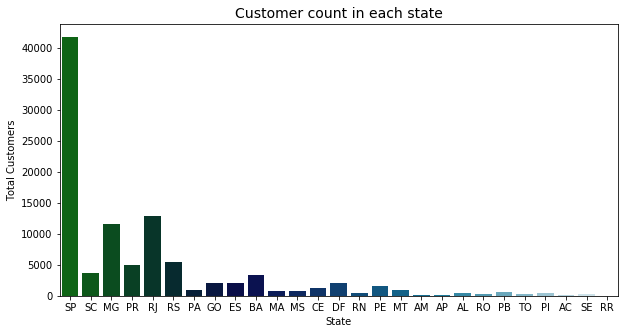

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x='customer_state', data=customer, palette='ocean')
#format_spines(ax, right_border=False)
ax.set_title('Customer count in each state', size=14)
ax.set_xlabel('State')
ax.set_ylabel('Total Customers')
plt.show()

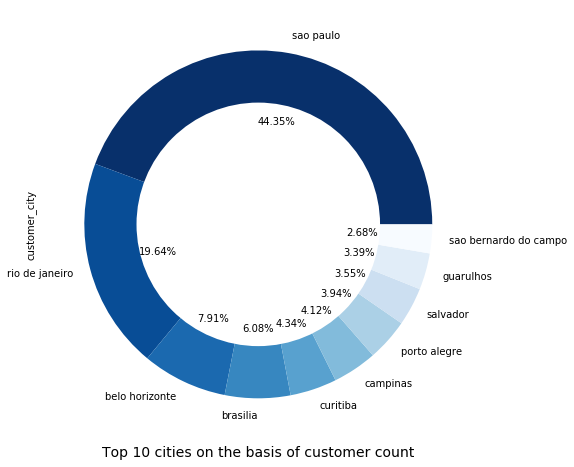

In [7]:
plt.figure(figsize=(10,8))
customer.customer_city.value_counts().head(10).plot(kind='pie',autopct='%1.2f%%',pctdistance=.6,cmap='Blues_r')
plt.xlabel('Top 10 cities on the basis of customer count', size=14)
centre_circle=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf() #gcf=get current figure
fig.gca().add_artist(centre_circle)

In [8]:
geolocation=pd.read_csv('olist_geolocation_dataset.csv')
geolocation.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [121]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000121 entries, 0 to 1000162
Data columns (total 6 columns):
geolocation_zip_code_prefix    1000121 non-null int64
geolocation_lat                1000121 non-null float64
geolocation_lng                1000121 non-null float64
geolocation_city               1000121 non-null object
geolocation_state              1000121 non-null object
geolocation_state_labelled     1000121 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 53.4+ MB


In [10]:
from sklearn.preprocessing import LabelEncoder
x1=LabelEncoder()
geolocation['geolocation_state_labelled']=x1.fit_transform(geolocation['geolocation_state'])
#geolocation=geolocation.drop('geolocation_stateo',axis=1)
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geolocation_state_labelled
0,1037,-23.545621,-46.639292,sao paulo,SP,25
1,1046,-23.546081,-46.644820,sao paulo,SP,25
2,1046,-23.546129,-46.642951,sao paulo,SP,25
3,1041,-23.544392,-46.639499,sao paulo,SP,25
4,1035,-23.541578,-46.641607,sao paulo,SP,25


In [11]:
geolocation = geolocation[geolocation.geolocation_lat <= 5.27438888]
#it’s most Western spot is at 73 deg, 58′ 58.19″W Long.
geolocation = geolocation[geolocation.geolocation_lng >= -73.98283055]
#It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude.
geolocation = geolocation[geolocation.geolocation_lat >= -33.75116944]
#It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
geolocation = geolocation[geolocation.geolocation_lng <=  -34.79314722]

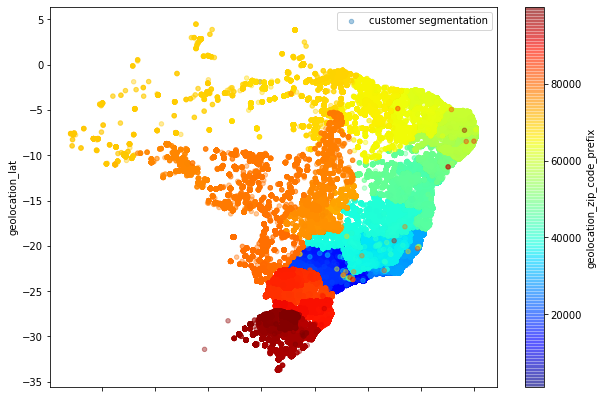

In [12]:
geolocation.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat",
     label="customer segmentation",c='geolocation_zip_code_prefix',cmap=plt.get_cmap("jet"), alpha=0.4,
    colorbar=True, figsize=(10,7),)
plt.legend()
plt.show()

In [43]:
payment=pd.read_csv('olist_order_payments_dataset.csv')
payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [123]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
order_id                103886 non-null object
payment_sequential      103886 non-null int64
payment_type            103886 non-null object
payment_installments    103886 non-null int64
payment_value           103886 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


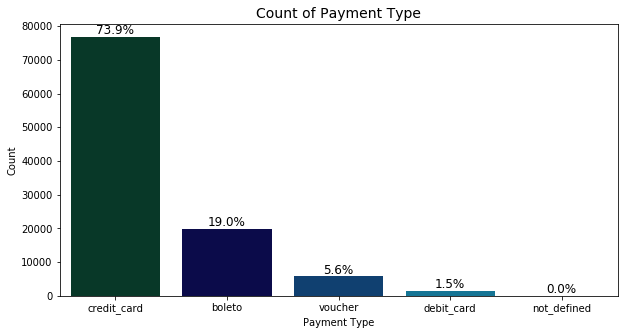

In [46]:
fig, ax = plt.subplots(figsize=(10, 5))
ax=sns.countplot(payment['payment_type'],palette='ocean')
ncount = len(payment)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', size=12)
ax.set_title('Count of Payment Type', size=14)
ax.set_xlabel('Payment Type')
ax.set_ylabel('Count')
plt.show()

In [45]:
payment.groupby('order_id')['payment_value'].sum().sort_values(ascending=False)

order_id
03caa2c082116e1d31e67e9ae3700499    13664.08
736e1922ae60d0d6a89247b851902527     7274.88
0812eb902a67711a1cb742b3cdaa65ae     6929.31
fefacc66af859508bf1a7934eab1e97f     6922.21
f5136e38d1a14a4dbd87dff67da82701     6726.66
                                      ...   
e8bbc1d69fee39eee4c72cb5c969e39d       10.07
f1d5c2e6867fa93ceee9ef9b34a53cbf        9.59
c8c528189310eaa44a745b8d9d26908b        0.00
00b1cb0320190ca0daa2c88b35206009        0.00
4637ca194b6387e2d538dc89b124b0ee        0.00
Name: payment_value, Length: 99440, dtype: float64

In [149]:
orderitems=pd.read_csv('olist_order_items_dataset.csv')
orderitems

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [158]:
orderitems.order_id.nunique()

98666

In [157]:
x=orderitems.groupby('order_id')['product_id'].nunique().sort_values(ascending=False)
x=pd.DataFrame(x)
x.reset_index()

,order_id,product_id
0,ca3625898fbd48669d50701aba51cd5f,8
1,7d8f5bfd5aff648220374a2df62e84d5,7
2,77df84f9195be22a4e9cb72ca9e8b4c2,7
3,ad850e69fce9a512ada84086651a2e7d,7
4,3990f96693d321ac142fff312bf3706a,6
...,...,...
98661,a9d9773efe0a981195d2861250cff4d9,1
98662,a9d9e48bc0905664f33c53779b5edfb6,1
98663,a9da0d64f6c4dff3f3f383f6b076b24a,1
98664,a9da66f1dfe4cca8956f5e74619c2cb9,1


In [122]:
orderitems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
order_id               112650 non-null object
order_item_id          112650 non-null int64
product_id             112650 non-null object
seller_id              112650 non-null object
shipping_limit_date    112650 non-null object
price                  112650 non-null float64
freight_value          112650 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [95]:
orderitems.shape

(112650, 7)

In [97]:
orderitems.order_id.nunique()

98666

In [14]:
orderitems.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of price')

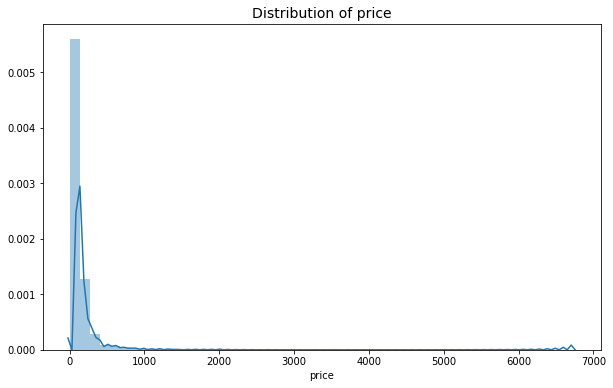

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
ax=sns.distplot(orderitems['price'])
ax.set_title('Distribution of price', size=14)

In [16]:
orders=pd.read_csv('olist_orders_dataset.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [124]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 11 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null datetime64[ns]
order_approved_at                99281 non-null datetime64[ns]
order_delivered_carrier_date     97658 non-null datetime64[ns]
order_delivered_customer_date    96476 non-null datetime64[ns]
order_estimated_delivery_date    99441 non-null datetime64[ns]
order_purchase_year              99441 non-null int64
order_purchase_month             99441 non-null int64
order_purchase_dayofweek         99441 non-null int64
dtypes: datetime64[ns](5), int64(3), object(3)
memory usage: 8.3+ MB


In [99]:
orders.order_id.nunique()

99441

In [96]:
orders.shape

(99441, 11)

In [17]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [18]:
orders[orders['order_delivered_customer_date'].isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [47]:
orders[orders['order_status']!='delivered']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_dayofweek
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,2017,4,1
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,2018,6,0
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,2018,8,4
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,2017,9,6
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,2018,1,2
...,...,...,...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01,2018,8,4
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06,2018,1,4
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27,2018,9,3
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15,2017,8,2


In [25]:
orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [19]:
time_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
           'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in time_cols:
    orders[col] = pd.to_datetime(orders[col])
    
# Checking
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [20]:
orders['order_purchase_year'] = orders['order_purchase_timestamp'].apply(lambda x: x.year)

# Creating new month column
orders['order_purchase_month'] = orders['order_purchase_timestamp'].apply(lambda x: x.month)

# Creating new day of week column
orders['order_purchase_dayofweek'] = orders['order_purchase_timestamp'].apply(lambda x: x.dayofweek)

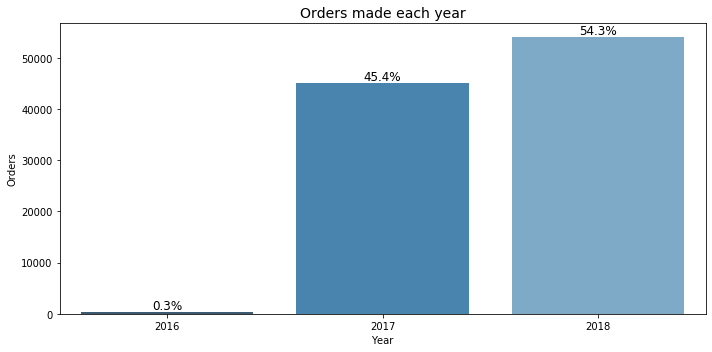

In [64]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x='order_purchase_year', data=orders, palette='Blues_d')
#format_spines(ax, right_border=False)

# Showing frequency
ncount = len(orders)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', size=12)

ax.set_title('Orders made each year', size=14)
ax.set_ylabel('Orders')
ax.set_xlabel('Year')

plt.tight_layout()
plt.show()

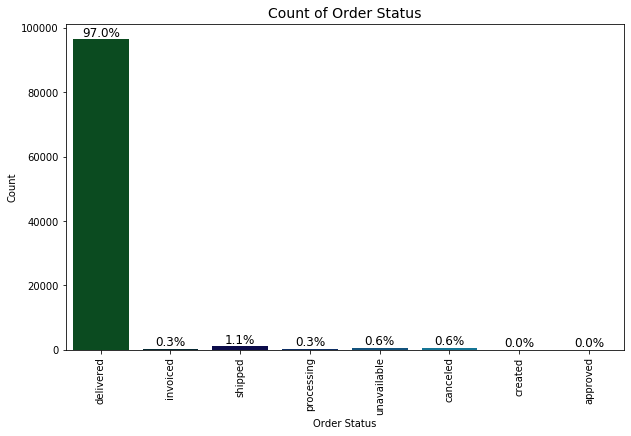

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x='order_status', data=orders, palette='ocean')
#format_spines(ax, right_border=False)
ncount = len(orders)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', size=12)
ax.set_title('Count of Order Status', size=14)
ax.set_xlabel('Order Status')
ax.set_ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [27]:
min_order_date = orders['order_purchase_timestamp'].min()
max_order_date = orders['order_purchase_timestamp'].max()
print(f'We have orders from {min_order_date} to {max_order_date}')

We have orders from 2016-09-04 21:15:19 to 2018-10-17 17:30:18


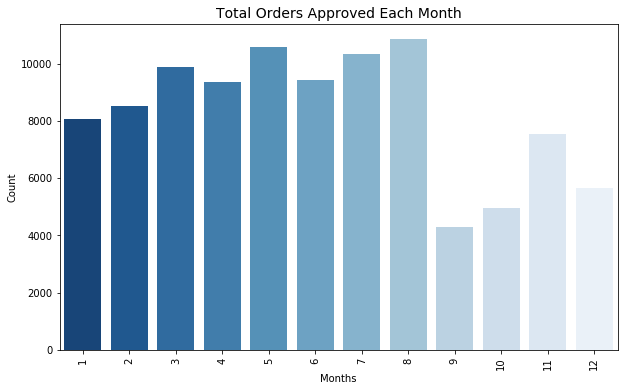

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='order_purchase_month', data=orders, palette='Blues_r')
ax.set_title('Total Orders Approved Each Month', size=14)
ax.set_xlabel('Months')
ax.set_ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [31]:
df_orders_items = orders.merge(orderitems, on='order_id', how='inner')

# Creating a column for calculating item + freight value
df_orders_items['total_sales'] = df_orders_items['price'] + df_orders_items['freight_value']

df_sales = df_orders_items.groupby(['order_purchase_year', 'order_purchase_month'], 
                         as_index=False).sum()
df_sales = df_sales.loc[:, ['order_purchase_year', 'order_purchase_month', 'total_sales']]

# Splitting sets by year
df_sales_2016 = df_sales[df_sales['order_purchase_year']==2016]
df_sales_2017 = df_sales[df_sales['order_purchase_year']==2017]
df_sales_2018 = df_sales[df_sales['order_purchase_year']==2018]

In [101]:
df_orders_items.order_id.nunique()

98666

In [102]:
df_orders_items.shape

(112650, 18)

In [34]:
df_orders_items.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_sales
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,0,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,1,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,2,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,5,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,1,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,28.62


In [118]:
df_orders_items.to_csv('orders_items.csv')

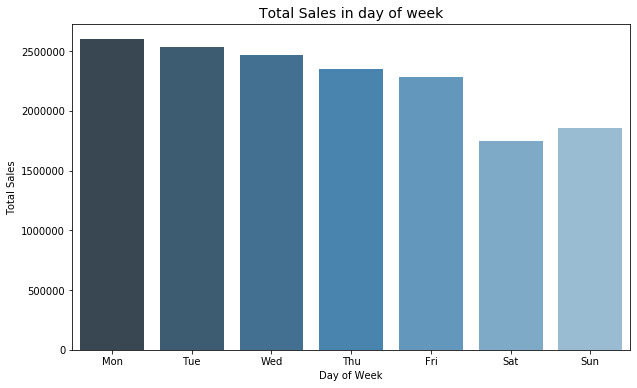

In [73]:
df_day_sales=df_orders_items.groupby('order_purchase_dayofweek')['total_sales'].sum()
df_day_sales=df_day_sales.reset_index()
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(y='total_sales', x='order_purchase_dayofweek', data=df_day_sales, ci=None,
                 palette='Blues_d')
#format_spines(ax, right_border=False)
ax.set_title('Total Sales in day of week', size=14)
ax.set_ylabel('Total Sales')
ax.set_xlabel('Day of Week')
ax.set_xticks(np.arange(7))
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

In [35]:
df_orders_items.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
order_purchase_year                 0
order_purchase_month                0
order_purchase_dayofweek            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
total_sales                         0
dtype: int64

In [32]:
months = np.arange(1, 13)
df_append = pd.DataFrame({})
grouped_dfs = df_sales_2016, df_sales_2017, df_sales_2018
years = [2016, 2017, 2018]
idx = 0

for df in grouped_dfs:
    for month in months:
        # If there is a nonexistent month
        if month not in df['order_purchase_month'].values:
            dict_append = {
                'order_purchase_year': years[idx],
                'order_purchase_month': month,
                'total_sales': 0
            }
            df_append = df_append.append(dict_append, ignore_index=True)
    # Insert the dictionary on dataset and sort it by month
    df = df.append(df_append).astype(int)
    df.sort_values(by='order_purchase_month', inplace=True)
    df_append = pd.DataFrame({})
    if idx == 0:
        df_sales_2016 = df
    elif idx == 1:
        df_sales_2017 = df
    else:
        df_sales_2018 = df
    idx += 1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


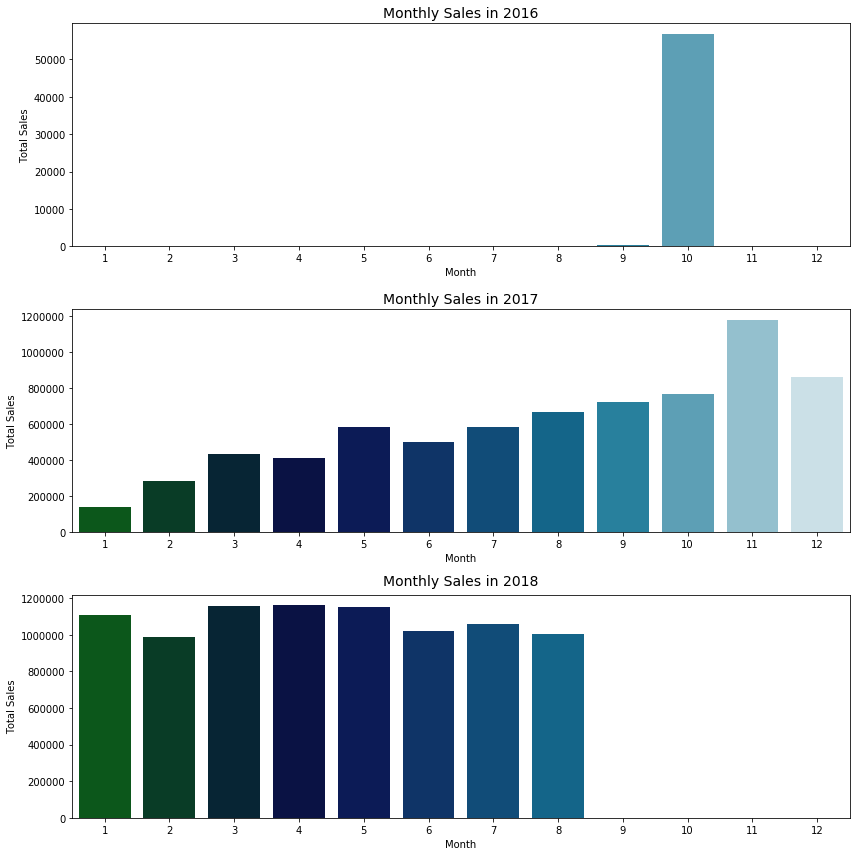

In [33]:
fig, axs = plt.subplots(3, 1, figsize=(12, 12))
sns.barplot(x='order_purchase_month', y='total_sales', data=df_sales_2016, ax=axs[0], palette='ocean')
sns.barplot(x='order_purchase_month', y='total_sales', data=df_sales_2017, ax=axs[1], palette='ocean')
sns.barplot(x='order_purchase_month', y='total_sales', data=df_sales_2018, ax=axs[2], palette='ocean')

# Customizing
axs_list = axs[0], axs[1], axs[2]
for ax in axs_list:
    #format_spines(ax, right_border=False)
    ax.set_xlabel('Month')
    ax.set_ylabel('Total Sales')
axs[0].set_title('Monthly Sales in 2016', size=14)
axs[1].set_title('Monthly Sales in 2017', size=14)
axs[2].set_title('Monthly Sales in 2018', size=14, pad=10)
ax.set_xticks(np.arange(13))
ax.set_xticklabels(['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()

[Text(0, 0, ''),
 Text(0, 0, 'Jan'),
 Text(0, 0, 'Feb'),
 Text(0, 0, 'Mar'),
 Text(0, 0, 'Apr'),
 Text(0, 0, 'May'),
 Text(0, 0, 'Jun'),
 Text(0, 0, 'Jul'),
 Text(0, 0, 'Aug'),
 Text(0, 0, 'Sep'),
 Text(0, 0, 'Oct'),
 Text(0, 0, 'Nov'),
 Text(0, 0, 'Dec')]

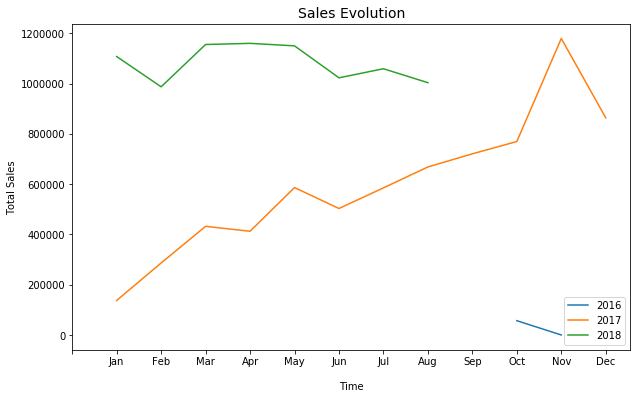

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='order_purchase_month', y='total_sales', data=df_sales_2016.iloc[9:11,:], label='2016')
sns.lineplot(x='order_purchase_month', y='total_sales', data=df_sales_2017, label='2017')
sns.lineplot(x='order_purchase_month', y='total_sales', data=df_sales_2018.iloc[:-4, :], label='2018')
#format_spines(ax2, right_border=False)
ax.set_xlabel('Time', labelpad=15)
ax.set_ylabel('Total Sales')
ax.set_title('Sales Evolution', size=14)
ax.set_xticks(np.arange(13))
ax.set_xticklabels(['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec'])

Text(0.5, 1.0, 'Online Sales growth over the years')

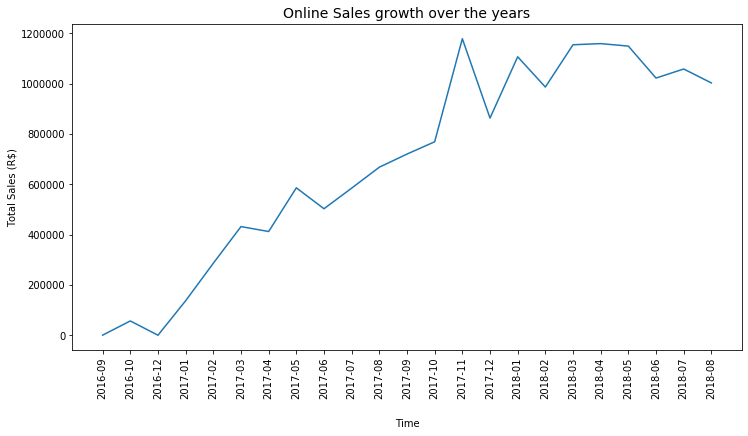

In [79]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x='month_year', y='total_sales', data=df_sales.iloc[:-1, :], ax=ax)
#format_spines(ax1, right_border=False)
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Time', labelpad=20)
ax.set_ylabel('Total Sales (R$)')
ax.set_title('Online Sales growth over the years', size=14)

In [48]:
products=pd.read_csv('olist_products_dataset.csv')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [152]:
products.groupby('product_category_name')['product_id'].count()

product_category_name
agro_industria_e_comercio      74
alimentos                      82
alimentos_bebidas             104
artes                          55
artes_e_artesanato             19
                             ... 
sinalizacao_e_seguranca        93
tablets_impressao_imagem        9
telefonia                    1134
telefonia_fixa                116
utilidades_domesticas        2335
Name: product_id, Length: 73, dtype: int64

In [125]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
product_id                    32951 non-null object
product_category_name         32341 non-null object
product_name_lenght           32341 non-null float64
product_description_lenght    32341 non-null float64
product_photos_qty            32341 non-null float64
product_weight_g              32949 non-null float64
product_length_cm             32949 non-null float64
product_height_cm             32949 non-null float64
product_width_cm              32949 non-null float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [49]:
orderprod=pd.merge(orderitems,products,left_on='product_id',right_on='product_id',how='inner')
orderprod.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0


In [50]:
df_orders_products=orderprod[['order_id','order_item_id','product_id','seller_id','shipping_limit_date','price',\
                              'freight_value','product_category_name','product_photos_qty']]

In [51]:
catname=pd.read_csv('product_category_name_translation.csv')
catname.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [52]:
df_order_prod=pd.merge(df_orders_products,catname,how='outer')
df_order_prod.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_photos_qty,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,4.0,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,4.0,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,4.0,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,4.0,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,4.0,cool_stuff


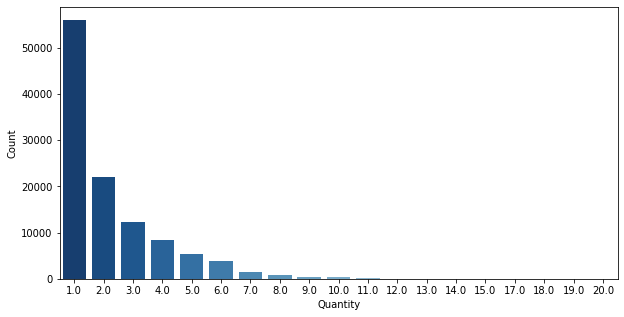

In [53]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x='product_photos_qty', data=df_order_prod, palette='Blues_r')
#format_spines(ax, right_border=False)
#ax.set_title('Customer count in each state', size=14)
ax.set_xlabel('Quantity')
ax.set_ylabel('Count')
plt.show()

In [54]:
x=df_order_prod['product_category_name_english'].value_counts()
count=pd.DataFrame(x)
count=count.rename(columns={'product_category_name_english':'Count'})
count=count.reset_index()
count=count.rename(columns={'index':'product_category_name_english'})
count

,product_category_name_english,Count
0,bed_bath_table,11115
1,health_beauty,9670
2,sports_leisure,8641
3,furniture_decor,8334
4,computers_accessories,7827
...,...,...
66,arts_and_craftmanship,24
67,cds_dvds_musicals,14
68,la_cuisine,14
69,fashion_childrens_clothes,8


In [55]:
y=df_order_prod.groupby('product_category_name_english')['price'].mean()
mean=pd.DataFrame(y)
mean=mean.rename(columns={'price':'mean_price'})
mean=mean.reset_index()
mean

,product_category_name_english,mean_price
0,agro_industry_and_commerce,342.124858
1,air_conditioning,185.269226
2,art,115.802105
3,arts_and_craftmanship,75.583750
4,audio,139.254121
...,...,...
66,stationery,91.753369
67,tablets_printing_image,90.703735
68,telephony,71.213978
69,toys,117.548360


In [56]:
new=pd.merge(count,mean)
new

,product_category_name_english,Count,mean_price
0,bed_bath_table,11115,93.296327
1,health_beauty,9670,130.163531
2,sports_leisure,8641,114.344285
3,furniture_decor,8334,87.564494
4,computers_accessories,7827,116.513903
...,...,...,...
66,arts_and_craftmanship,24,75.583750
67,cds_dvds_musicals,14,52.142857
68,la_cuisine,14,146.785000
69,fashion_childrens_clothes,8,71.231250


In [57]:
print(new['mean_price'].max())
print(new['mean_price'].min())

1098.3405418719215
25.342333333333332


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of mean price of product categories')

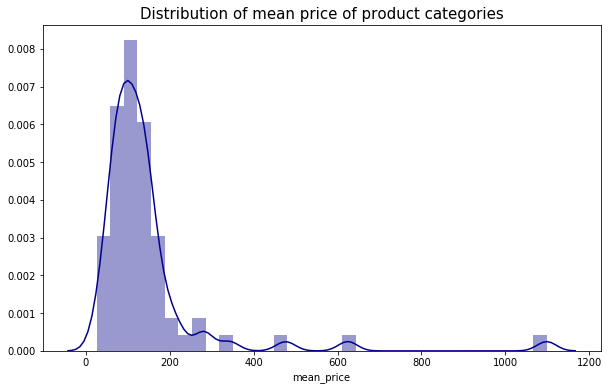

In [126]:
fig, ax = plt.subplots(figsize=(10, 6))
ax=sns.distplot(new['mean_price'],color='darkblue')
ax.set_title('Distribution of mean price of product categories',size=15)

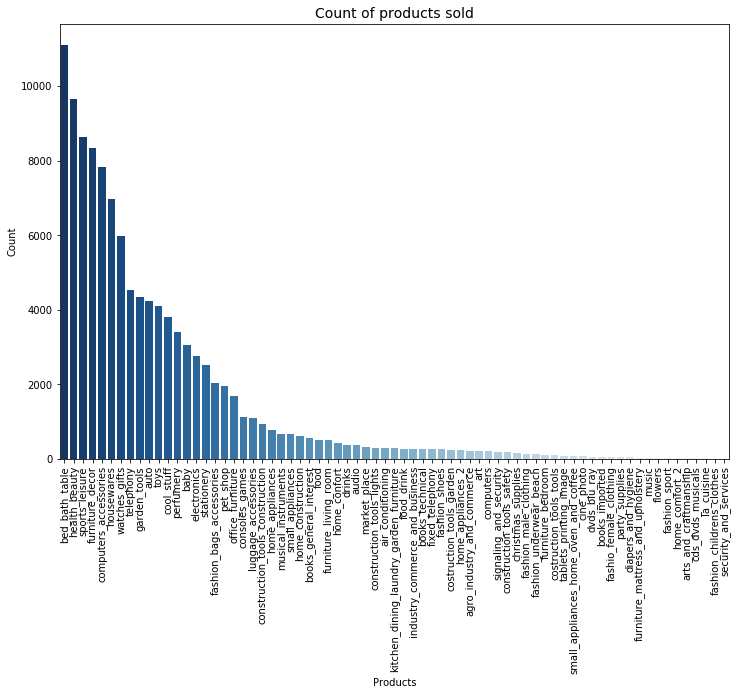

In [63]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(x="product_category_name_english", y="Count", data=new,palette="Blues_r")
plt.xticks(rotation=90)
ax.set_title('Count of products sold', size=14)
ax.set_ylabel('Count')
ax.set_xlabel('Products')
plt.show()

In [65]:
df_cust_order=pd.merge(customer,df_orders_items,left_on='customer_id',right_on='customer_id')
df_cust_order.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_sales
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017,5,1,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,2018,1,4,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,2018,5,5,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,2018,3,1,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,2018,7,6,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,252.25


In [120]:
df_cust_order.to_csv('customer_order_items.csv')

In [119]:
df_cust_order.shape

(112650, 22)

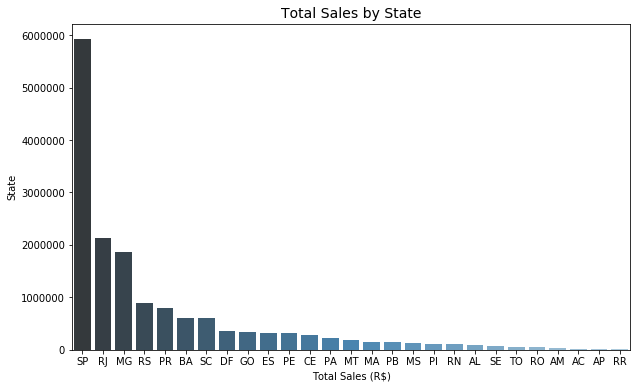

In [72]:
df_sales_state = df_cust_order.groupby('customer_state')['total_sales'].sum().sort_values(ascending=False)
#df_sales_state.sort_values(by='total_sales', ascending=False, inplace=True)
df_sales_state=df_sales_state.reset_index()
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(y='total_sales', x='customer_state', data=df_sales_state, ci=None,
                 palette='Blues_d')
#format_spines(ax, right_border=False)
ax.set_title('Total Sales by State', size=14)
ax.set_xlabel('Total Sales (R$)')
ax.set_ylabel('State')
plt.show()

In [81]:
df_new_prod=pd.merge(df_cust_order,products,left_on='product_id',right_on='product_id')
df_new_prod.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,freight_value,total_sales,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,21.88,146.87,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,24.90,137.89,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,24.90,137.89,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,15.62,140.61,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,30.59,137.58,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0


In [83]:
df_new_prod=df_new_prod.drop(['product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g',\
                 'product_length_cm','product_height_cm','product_width_cm'],axis=1)

In [84]:
df_new_prod1=pd.merge(df_new_prod,catname,how='outer')
df_new_prod1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_purchase_dayofweek,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_sales,product_category_name,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,146.87,moveis_escritorio,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,3,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,137.89,moveis_escritorio,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,3,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,137.89,moveis_escritorio,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,6,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,140.61,moveis_escritorio,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,5,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,137.58,moveis_escritorio,office_furniture


In [85]:
df_new_prod1.shape

(112650, 24)

In [86]:
df_new_pay=pd.merge(df_new_prod1,payment,left_on='order_id',right_on='order_id')
df_new_pay.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,shipping_limit_date,price,freight_value,total_sales,product_category_name,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-05-22 15:22:12,124.99,21.88,146.87,moveis_escritorio,office_furniture,1,credit_card,2,146.87
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,2017-11-23 00:47:18,112.99,24.90,137.89,moveis_escritorio,office_furniture,1,credit_card,1,275.79
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,2017-11-23 00:47:18,112.99,24.90,137.89,moveis_escritorio,office_furniture,1,credit_card,1,275.79
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,2017-05-22 22:22:56,124.99,15.62,140.61,moveis_escritorio,office_furniture,1,credit_card,7,140.61
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,2018-02-18 21:29:19,106.99,30.59,137.58,moveis_escritorio,office_furniture,1,credit_card,10,137.58


In [87]:
df_new_pay.isnull().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date    2567
order_estimated_delivery_date       0
order_purchase_year                 0
order_purchase_month                0
order_purchase_dayofweek            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
total_sales                         0
product_category_name            1698
product_category_name_english    1723
payment_sequential                  0
payment_type                        0
payment_inst

In [89]:
df_delivered_prod=df_new_pay[df_new_pay['order_status']=='delivered']
df_delivered_prod.isnull().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date        2
order_delivered_customer_date       8
order_estimated_delivery_date       0
order_purchase_year                 0
order_purchase_month                0
order_purchase_dayofweek            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
total_sales                         0
product_category_name            1628
product_category_name_english    1651
payment_sequential                  0
payment_type                        0
payment_inst

In [90]:
rev=pd.read_csv('review_translation.csv')
rev.head()

,Unnamed: 0,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,new,rev_en
0,0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,NaN,NaN
1,1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,NaN,NaN
2,2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,NaN,NaN
3,3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,recebi bem antes do prazo estipulado.,I received it well before the deadline.
4,4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,parabéns lojas lannister adorei comprar pela i...,congratulations lannister stores loved shoppin...


In [91]:
rev=rev.drop(['Unnamed: 0','review_comment_title','new'],axis=1)
rev.head()

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,rev_en
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,NaN
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,NaN
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,NaN
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,I received it well before the deadline.
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,congratulations lannister stores loved shoppin...


In [92]:
df_sub=pd.merge(df_delivered_prod,rev,left_on='order_id',right_on='order_id')
df_sub.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,rev_en
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,NaN
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,1,credit_card,1,275.79,7fc63200f12eebb5f387856afdd63db8,1,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,"I would like a solution, I really need the pro..."
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,1,credit_card,1,275.79,7fc63200f12eebb5f387856afdd63db8,1,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,"I would like a solution, I really need the pro..."
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,1,credit_card,7,140.61,251191809e37c1cffc16865947c18a4d,3,"Produto compatível com seu valor, muito bonito...",2017-05-27 00:00:00,2017-05-28 02:43:16,"product compatible with its value, very beauti..."
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,1,credit_card,10,137.58,f7123bac5b91a0e2e38d8b41fd1206f4,4,Entregou antes do prazo,2018-03-01 00:00:00,2018-03-02 11:11:24,delivered ahead of time


In [94]:
df_sub.customer_id.nunique()

96477

In [93]:
df_sub.customer_id.shape

(115728,)

In [98]:
df_sub=df_sub.drop_duplicates(subset=['order_id','order_item_id'],keep='first')
df_sub.shape

(110194, 34)

In [103]:
df_sub.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,rev_en
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,NaN
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,1,credit_card,1,275.79,7fc63200f12eebb5f387856afdd63db8,1,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,"I would like a solution, I really need the pro..."
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,1,credit_card,1,275.79,7fc63200f12eebb5f387856afdd63db8,1,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,"I would like a solution, I really need the pro..."
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,1,credit_card,7,140.61,251191809e37c1cffc16865947c18a4d,3,"Produto compatível com seu valor, muito bonito...",2017-05-27 00:00:00,2017-05-28 02:43:16,"product compatible with its value, very beauti..."
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,1,credit_card,10,137.58,f7123bac5b91a0e2e38d8b41fd1206f4,4,Entregou antes do prazo,2018-03-01 00:00:00,2018-03-02 11:11:24,delivered ahead of time


In [106]:
df_sub.iloc[:,14:].head()

,order_purchase_dayofweek,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_sales,product_category_name,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,rev_en
0,1,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,146.87,moveis_escritorio,office_furniture,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,NaN
1,3,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,137.89,moveis_escritorio,office_furniture,1,credit_card,1,275.79,7fc63200f12eebb5f387856afdd63db8,1,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,"I would like a solution, I really need the pro..."
2,3,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,137.89,moveis_escritorio,office_furniture,1,credit_card,1,275.79,7fc63200f12eebb5f387856afdd63db8,1,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,"I would like a solution, I really need the pro..."
3,6,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,140.61,moveis_escritorio,office_furniture,1,credit_card,7,140.61,251191809e37c1cffc16865947c18a4d,3,"Produto compatível com seu valor, muito bonito...",2017-05-27 00:00:00,2017-05-28 02:43:16,"product compatible with its value, very beauti..."
4,5,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,137.58,moveis_escritorio,office_furniture,1,credit_card,10,137.58,f7123bac5b91a0e2e38d8b41fd1206f4,4,Entregou antes do prazo,2018-03-01 00:00:00,2018-03-02 11:11:24,delivered ahead of time


In [107]:
df_sub.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_purchase_year',
       'order_purchase_month', 'order_purchase_dayofweek', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'total_sales', 'product_category_name',
       'product_category_name_english', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'rev_en'],
      dtype='object')

In [112]:
df_sub[df_sub['order_id']=='8272b63d03f5f79c56e9e4120aec44ef'][['order_id','order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value','product_category_name_english','rev_en']]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,rev_en
59145,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,health_beauty,I have been trying to cancel for a long time d...
59146,8272b63d03f5f79c56e9e4120aec44ef,12,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,health_beauty,I have been trying to cancel for a long time d...
59147,8272b63d03f5f79c56e9e4120aec44ef,13,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,health_beauty,I have been trying to cancel for a long time d...
59148,8272b63d03f5f79c56e9e4120aec44ef,14,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,health_beauty,I have been trying to cancel for a long time d...
59149,8272b63d03f5f79c56e9e4120aec44ef,15,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,health_beauty,I have been trying to cancel for a long time d...
59150,8272b63d03f5f79c56e9e4120aec44ef,16,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,health_beauty,I have been trying to cancel for a long time d...
59151,8272b63d03f5f79c56e9e4120aec44ef,17,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,health_beauty,I have been trying to cancel for a long time d...
59152,8272b63d03f5f79c56e9e4120aec44ef,18,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,health_beauty,I have been trying to cancel for a long time d...
59153,8272b63d03f5f79c56e9e4120aec44ef,19,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,health_beauty,I have been trying to cancel for a long time d...
59154,8272b63d03f5f79c56e9e4120aec44ef,20,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,health_beauty,I have been trying to cancel for a long time d...


In [113]:
df_sub[df_sub['order_id']=='8272b63d03f5f79c56e9e4120aec44ef']['rev_en']

59145    I have been trying to cancel for a long time d...
59146    I have been trying to cancel for a long time d...
59147    I have been trying to cancel for a long time d...
59148    I have been trying to cancel for a long time d...
59149    I have been trying to cancel for a long time d...
59150    I have been trying to cancel for a long time d...
59151    I have been trying to cancel for a long time d...
59152    I have been trying to cancel for a long time d...
59153    I have been trying to cancel for a long time d...
59154    I have been trying to cancel for a long time d...
59155    I have been trying to cancel for a long time d...
59156    I have been trying to cancel for a long time d...
59157    I have been trying to cancel for a long time d...
59158    I have been trying to cancel for a long time d...
59159    I have been trying to cancel for a long time d...
59160    I have been trying to cancel for a long time d...
59161    I have been trying to cancel for a long time d.

In [116]:
df_sub['rev_en'][59157]

'I have been trying to cancel for a long time due to the very abusive freight charges'